# Polynomial Regression

## Objectives

*   Use scikit-learn to implement Polynomial Regression
*   Create a model, train it, test it and use the model


### Importing Needed packages


In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model


%matplotlib inline

## Reading the data

In [3]:
df = pd.read_csv("FuelConsumptionCo2.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## ***1. Data Exploration***

Let's first have a descriptive exploration on our data.


In [4]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


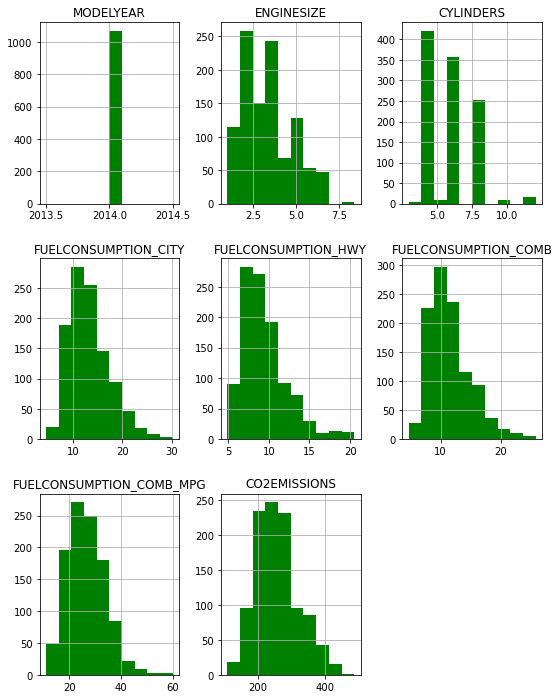

In [6]:
df.hist(figsize=(9,12), color='green')
plt.show()

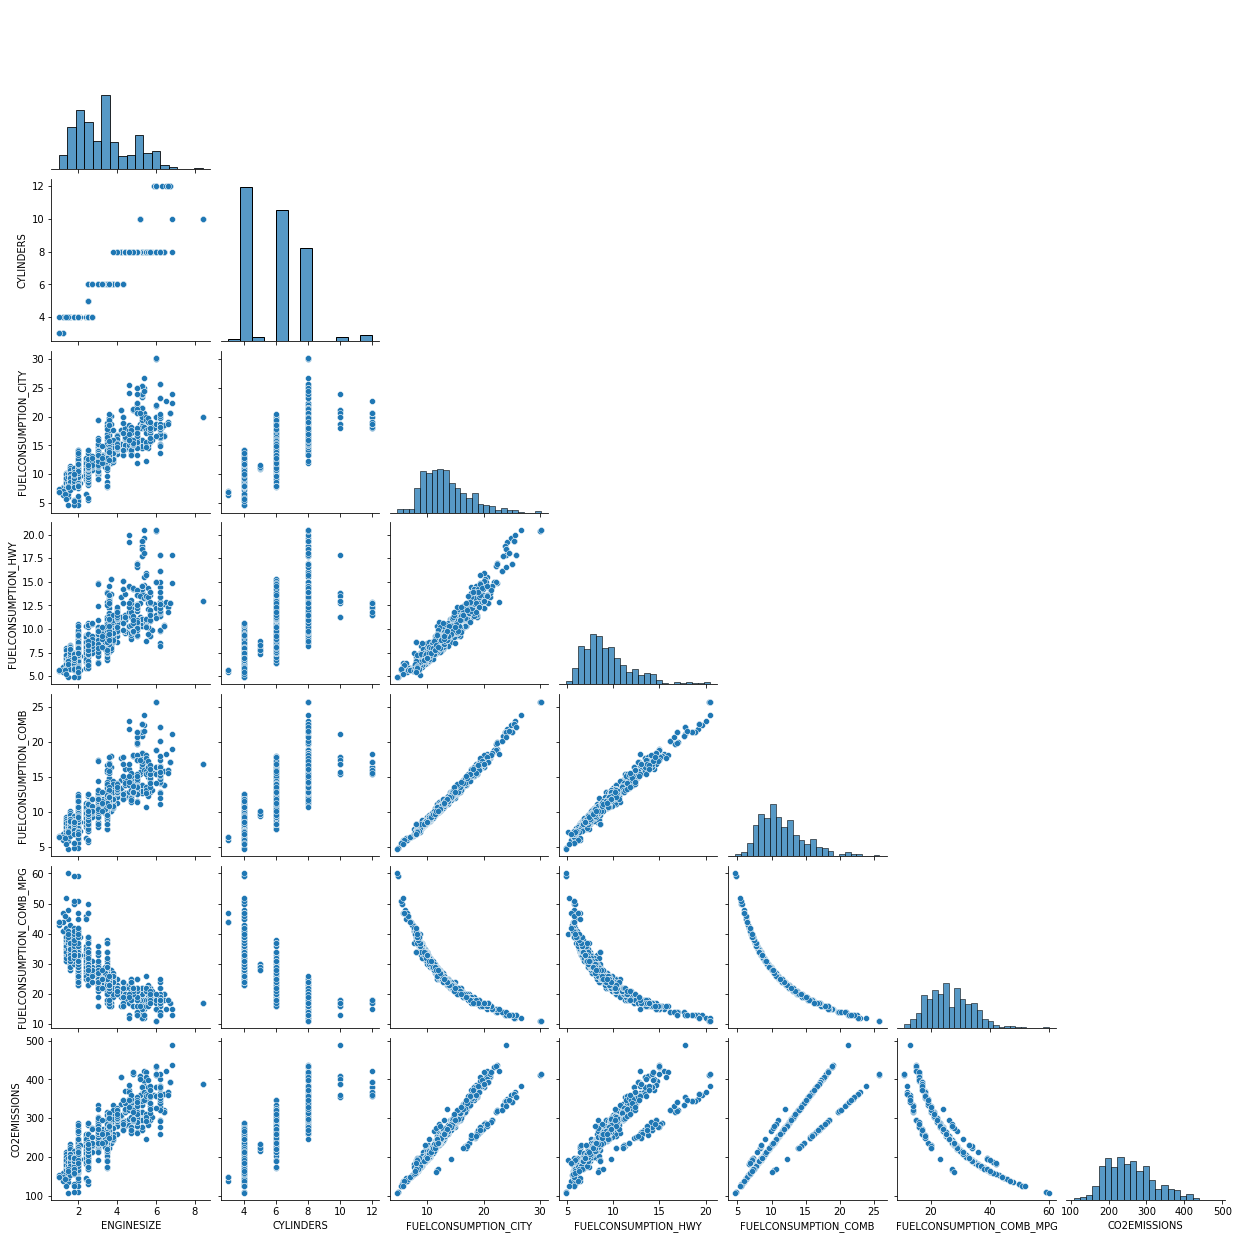

In [7]:
# plot the relationship between each pair of columns

sns.pairplot(df.drop("MODELYEAR",axis=1), corner=True)

ENGINESIZE seems to have a not a linear but curvy relationship with CO2 Emissions. 

So we can create a **PolynomialFeatures()** function in Scikit-learn library, which drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. 

For example, lets say the original feature set has only one feature, *ENGINESIZE*. If we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2

#### Creating train and test dataset

In [41]:
#Create training and test datasets
X = df["ENGINESIZE"]
Y = df["CO2EMISSIONS"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 5)

X_train = np.asanyarray(X_train)
X_test = np.asanyarray(X_test)
Y_train = np.asanyarray(Y_train)
Y_test = np.asanyarray(Y_test)

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(np.asanyarray(X_train).reshape(-1,1))
train_x_poly

array([[ 1.  ,  3.7 , 13.69],
       [ 1.  ,  3.7 , 13.69],
       [ 1.  ,  3.7 , 13.69],
       ...,
       [ 1.  ,  4.  , 16.  ],
       [ 1.  ,  3.6 , 12.96],
       [ 1.  ,  3.4 , 11.56]])

In [42]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, np.asanyarray(Y_train).reshape(-1,1))
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         49.90506043 -1.53555556]]
Intercept:  [109.35860515]


**Coefficient** and **Intercept** , are the parameters of the fit curvy line.

Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets. Lets plot it:

Text(0, 0.5, 'Emission')

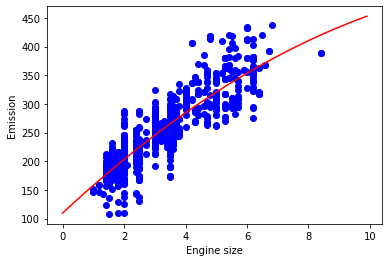

In [43]:
plt.scatter(X_train, Y_train,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

<h2 id="evaluation">Evaluation</h2>


In [44]:

test_x_poly = poly.transform(np.asanyarray(X_test).reshape(-1,1))
y_pred = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred[0] - Y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred[0] - Y_test) ** 2))
print("R2-score: %.2f" % r2_score(Y_test,y_pred ) )

Mean absolute error: 55.47
Residual sum of squares (MSE): 4602.52
R2-score: 0.80


## What if we set polynomial degree as 3 (cubic)?

In [45]:
def Polynomial_Regression(train_x, test_x, train_y, test_y, n):

    poly = PolynomialFeatures(degree=n)

    train_x_poly = poly.fit_transform(train_x.reshape(-1,1))
    clf = linear_model.LinearRegression()
    train_y_ = clf.fit(train_x_poly, train_y)

    # The coefficients
    print ('Coefficients: ', clf3.coef_)
    print ('Intercept: ',clf3.intercept_)
    plt.scatter(train_x, train_y,  color='green')

    XX = np.arange(0.0, 10.0, 0.1)

    yy = clf3.intercept_+ clf3.coef_[1]*XX + clf3.coef_[2]*np.power(XX, 2) + clf3.coef_[3]*np.power(XX, 3)
    plt.plot(XX, yy, '-r' )
    plt.xlabel("Independent Variable")
    plt.ylabel("Dependen Variable")

    test_x_poly = poly.transform(test_x.reshape(-1,1))
    test_y_ = clf.predict(test_x_poly)

    print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
    print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
    print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Coefficients:  [ 0.         26.36144341  4.92431183 -0.53303181]
Intercept:  134.46245198845799
Mean absolute error: 22.82
Residual sum of squares (MSE): 928.86
R2-score: 0.80


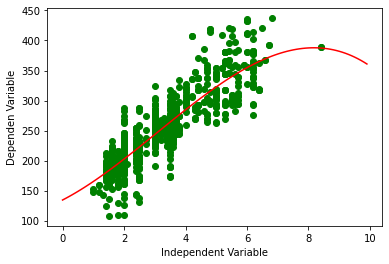

In [46]:
Polynomial_Regression(X_train, X_test, Y_train, Y_test, 3)

We see that R2 score did not change while MAE and MSE significant reduced when we set polynomial degree as 3 instead of 2 for the ENGINESIZE feature.